In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy

import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import geopandas
import cartopy.io.shapereader as shpreader
import shapely

In [2]:
places = pd.read_csv('../data/place_df.csv')

In [36]:
def plot_gridcells(ndf, var, degrees, lots=1):
    plt.figure(dpi=200)
    
    ndf.loc[ndf['LON']>180,"LON"]-=360

    ax = plt.axes(projection=ccrs.EqualEarth())

    n = np.array(ndf.n_study_prop).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))
    vm = n.max()
    n[n==0] = np.nan

    ax.coastlines(lw=0.1)
    mesh = ax.pcolormesh(
        ndf.LON.unique(),#-degrees*0.5,
        ndf.LAT.unique(),#-degrees*0.5,
        n,
        norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
        cmap=plt.cm.get_cmap('YlOrBr',8), 
        transform=ccrs.PlateCarree()
    )
    cbar = plt.colorbar(mesh, orientation="horizontal")
    
    cbar.ax.tick_params(labelsize=5)
    
    plt.savefig(f"../plots/maps/gridcells_studies_{var}_{str(degrees).replace('.','_')}.png")
    
    
    ndf["evidence_cat"] = np.nan

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']==0),"evidence_cat"
    ] = 1

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']>0),"evidence_cat"
    ] = 2

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']>lots),"evidence_cat"
    ] = 3

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']==0),"evidence_cat"
    ] = 4

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']>0),"evidence_cat"
    ] = 5

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']>lots),"evidence_cat"
    ] = 6
    
    colors = ["#abdda4","#3288bd", "#5e4fa2","#fee08b","#d53e4f","#9e0142"]

    cmap = mpl.colors.ListedColormap(colors)

    do_na = True
    if do_na:
        cmap = mpl.colors.ListedColormap(colors+["white","#e0e0e0","#878787"])
        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']==0),"evidence_cat"
        ] = 7

        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']>0),"evidence_cat"
        ] = 8

        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']>lots),"evidence_cat"
        ] = 9

        
    ## DA only
        
    plt.figure(dpi=150)
    
    ax = plt.axes(projection=ccrs.EqualEarth())
    
    bn = np.zeros((len(ndf.LAT.unique()), len(ndf.LON.unique())))
    bn+=1
    
    mesh = ax.pcolormesh(
        ndf.LON.unique(),#-degrees*0.5,
        ndf.LAT.unique(),#-degrees*0.5,
        bn,
        cmap = mpl.colors.ListedColormap(["#e0e0e0"]),
        transform=ccrs.PlateCarree(),
    )
    
    n = np.array(ndf.da_cat).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))
    ax.coastlines()
    mesh = ax.pcolormesh(
        ndf.LON.unique(),
        ndf.LAT.unique(),
        n,
        cmap=plt.cm.get_cmap('RdBu_r',7), vmin=-3, vmax=3,
        transform=ccrs.PlateCarree(),
    )
    cbar = plt.colorbar(mesh, orientation="horizontal")
    
    cbar.ax.tick_params(labelsize=5)
    
    plt.savefig(f"../plots/maps/gridcells_da_{var}_{str(degrees).replace('.','_')}.png")
    
    
    ## Combination
    
    plt.figure(dpi=150)

    ax = plt.axes(projection=ccrs.EqualEarth())

    n = np.array(ndf.evidence_cat).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

    ax.coastlines(lw=0.2)
    mesh = ax.pcolormesh(
        ndf.LON.unique(),#-degrees*0.5,
        ndf.LAT.unique(),#-degrees*0.5,
        n,
        cmap = cmap,
        transform=ccrs.PlateCarree(),
    )
    cbar = plt.colorbar(mesh, orientation="horizontal")
    cbar.set_ticks(np.array(np.linspace(1,cmap.N,cmap.N+1)[:-1]+0.5))

    cbar.set_ticklabels([
        "D&A trend\n - impacts",
        "D&A trend\n + impacts",
        "D&A trend\n ++ impacts",
        "no D&A trend\n - impacts",
        "no D&A trend\n + impacts",
        "no D&A trend\n ++ impacts",
        "no D&A data\n - impacts",
        "no D&A data\n + impacts",
        "no D&A data\n ++ impacts"
    ])
    cbar.ax.tick_params(labelsize=5)
    
    plt.savefig(f"../plots/maps/gridcells_da_studies_{var}_{str(degrees).replace('.','_')}.png")
    
    

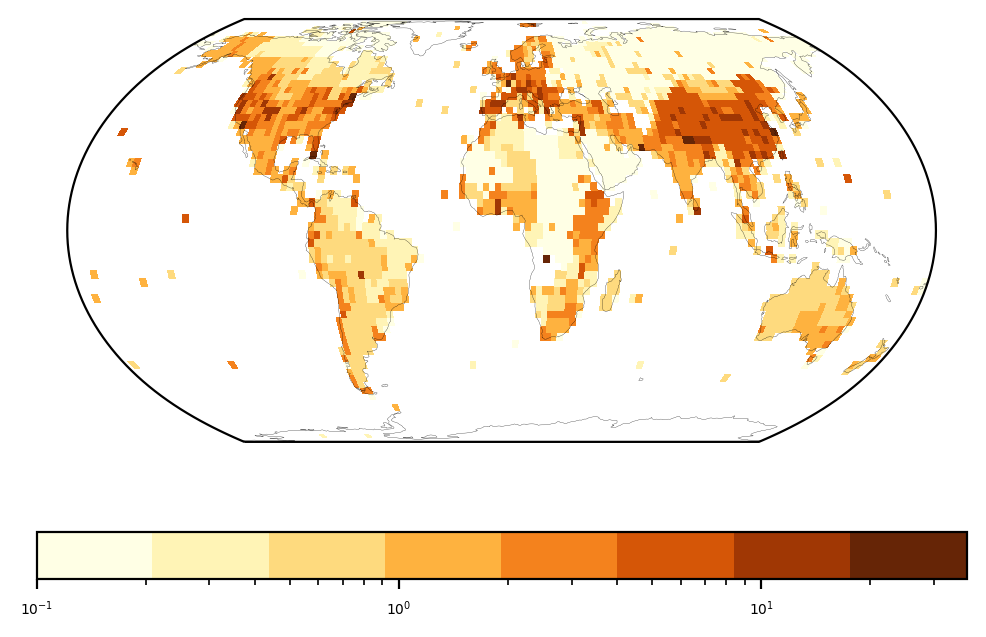

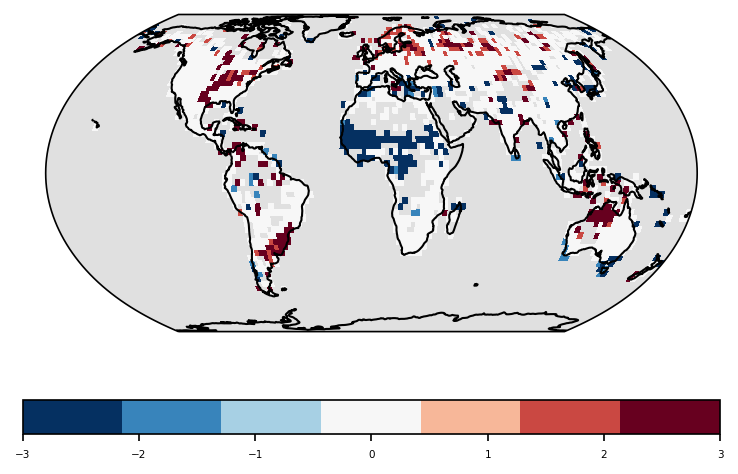

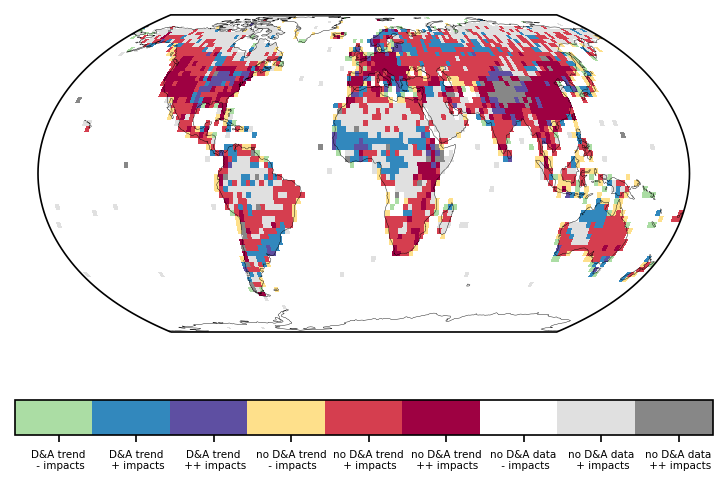

In [37]:
for degrees in [2.5]:
    ndf = pd.read_csv(f'../data/gridcell_studies_6 - Precipitation - upper_pred_{degrees}.csv')
    
    plot_gridcells(ndf, "precip", degrees, lots=2)

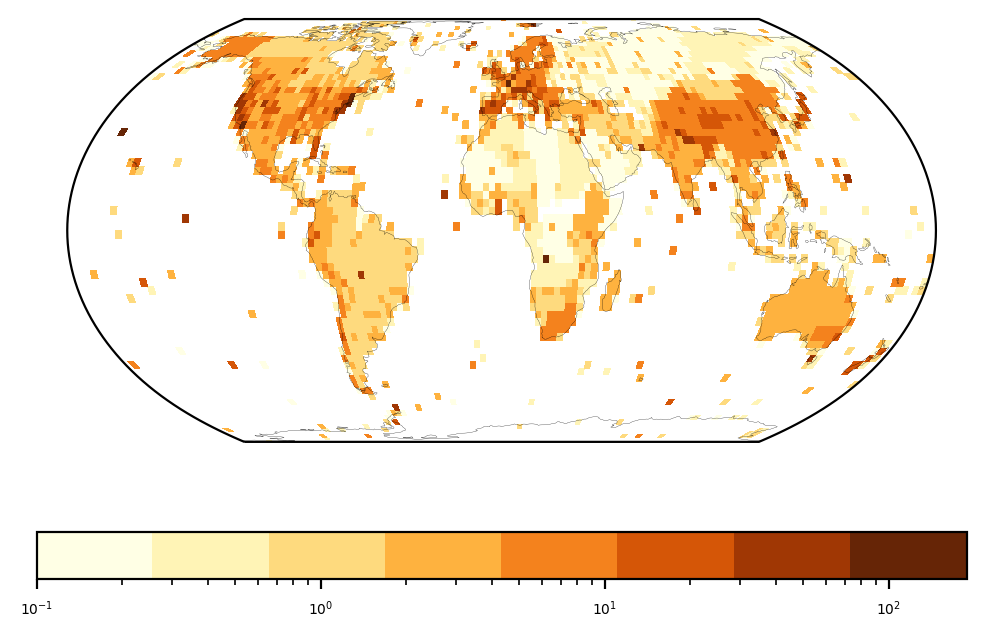

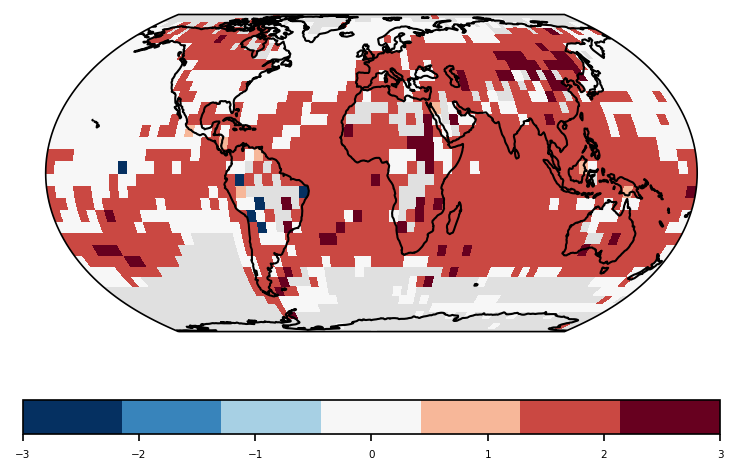

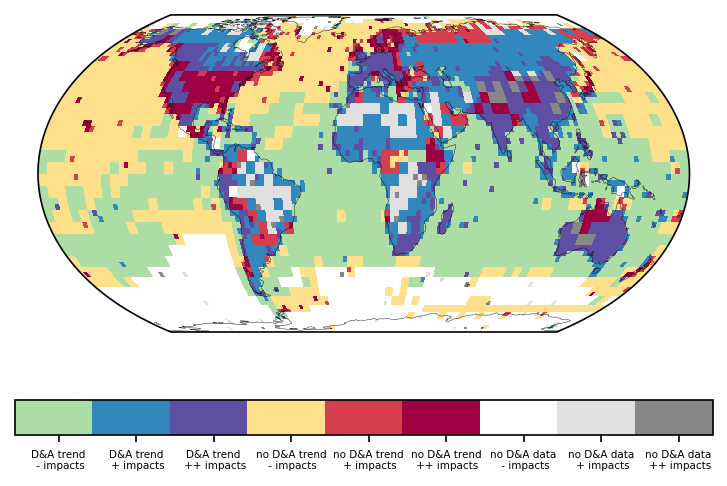

In [38]:
for degrees in [2.5]:
    ndf = pd.read_csv(f'../data/gridcell_studies_6 - Temperature - upper_pred_{degrees}.csv')
    plot_gridcells(ndf, "temp", degrees, lots=2)

# Example Sudan

In [4]:
shp_ndf_df = pd.read_csv('../data/country_ndf_correspondence.csv')

In [24]:
ndf = pd.read_csv(f'../data/gridcell_studies_6 - Precipitation - upper_pred_2.5.csv')

ndf["Country"] = np.nan
ndf["na"] = np.where(pd.isna(ndf["da_cat"]),1,np.nan)
ndf_ids = shp_ndf_df.loc[shp_ndf_df["shpfile_id"]==52, "ndf_id"]
ndf.loc[ndf_ids,"Country"]=ndf.loc[ndf_ids,"n_study_prop"]
ndf.loc[ndf_ids,"cmask"]=np.nan
n = np.array(ndf.Country).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

vm = np.nanmax(vm)

cn = np.array(ndf.na).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

bn = np.array(ndf.cmask).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

n[~np.isnan(n)]

array([0.14814815, 0.16194125, 0.16194125, 0.16194125, 0.16194125,
       0.14814815, 0.16194125, 0.16194125, 0.16194125, 0.66194125,
       0.16194125, 0.14814815, 0.16194125, 0.16194125, 0.16194125,
       2.12563173, 1.66194125, 0.16194125, 0.16194125, 0.16194125,
       0.16194125, 0.16194125, 0.16194125, 0.16194125, 0.16194125,
       0.16194125, 0.16194125])

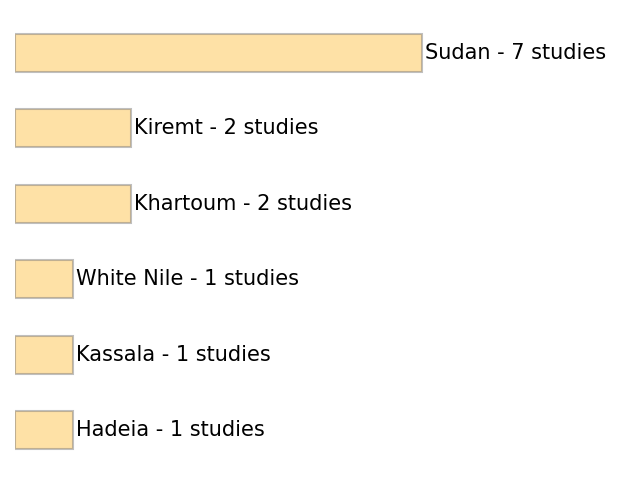

In [6]:
fig, ax = plt.subplots(dpi=150, figsize=(4,4))

df_ndf = pd.read_csv('../data/study_gridcell_6 - Precipitation - upper_pred_2.5.csv')
doc_ids = df_ndf.loc[df_ndf["ndf_id"].isin(ndf_ids),"doc_id"]

splaces = places[(places["doc_id"].isin(doc_ids)) & (places["country_predicted"]=="SDN")].groupby('word').size().sort_values()

splaces.plot.barh(color="#fec44f", alpha=0.5, edgecolor="grey")

for i, c in enumerate(splaces):
    ax.text(c+0.05, i, f"{splaces.index[i]} - {c} studies", va="center")
    
ax.set_xlim(0,c+1)
plt.axis('off')

plt.savefig("../plots/maps/sudan_precipitation_study_places.png", bbox_inches="tight")


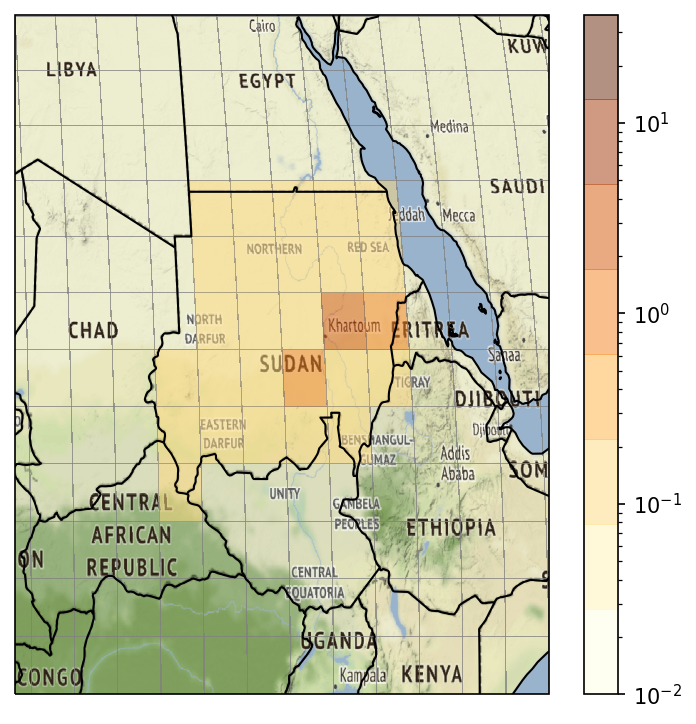

In [7]:
import cartopy.io.img_tiles as cimgt

stamen_terrain = cimgt.Stamen('terrain')

plt.figure(dpi=150, figsize=(6,6))
ax = plt.axes(projection=ccrs.EqualEarth())
ax.coastlines(lw=1)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, lw=1)
#ax.set_extent([0,30,50,80])

ax.set_extent([15,45,0,30])

ax.add_image(stamen_terrain, 5)

mesh = ax.pcolormesh(
    ndf.LON.unique(),#-degrees*0.5,
    ndf.LAT.unique(),#-degrees*0.5,
    n,
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    norm = mpl.colors.LogNorm(vmin=0.01, vmax=vm),
    cmap=plt.cm.get_cmap('YlOrBr',8), 
    lw=0.1,
    alpha=0.5
)

cbar = plt.colorbar(mesh)

plt.savefig("../plots/maps/sudan_precipitation_studies.png", bbox_inches="tight")


(10368, 8)


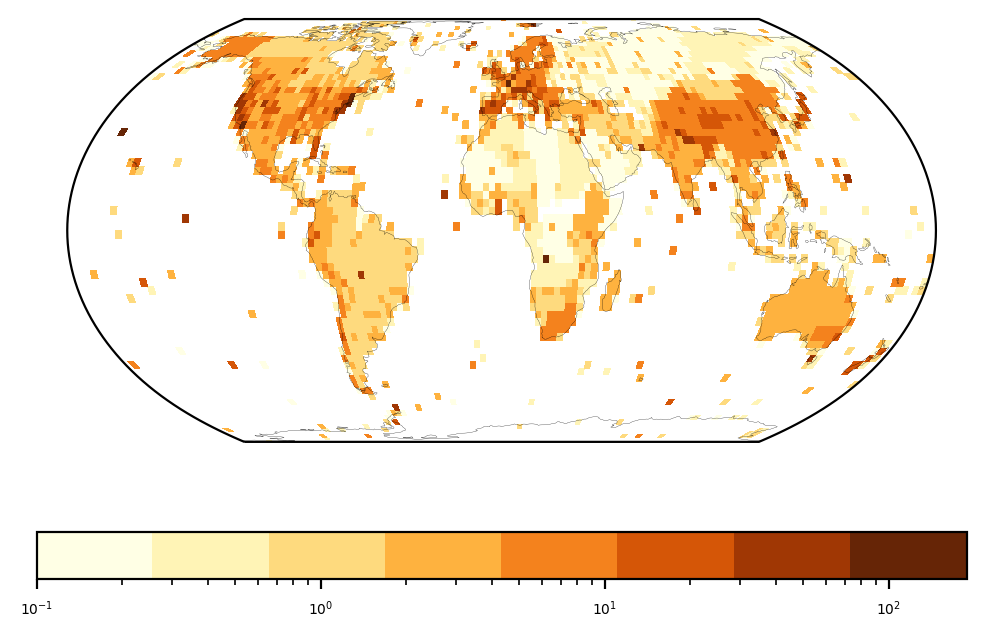

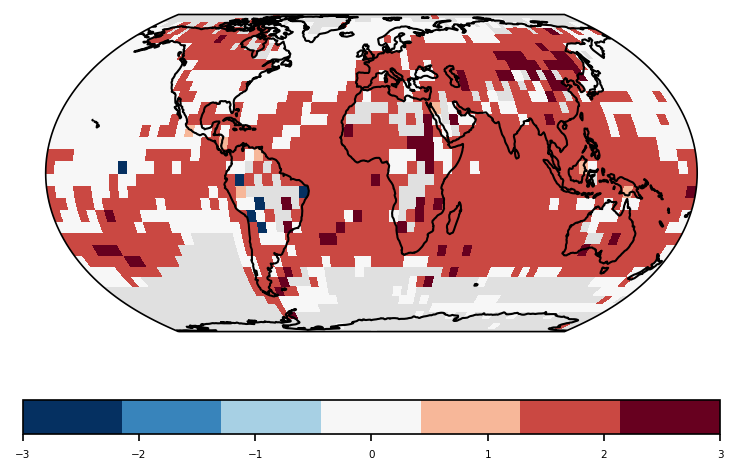

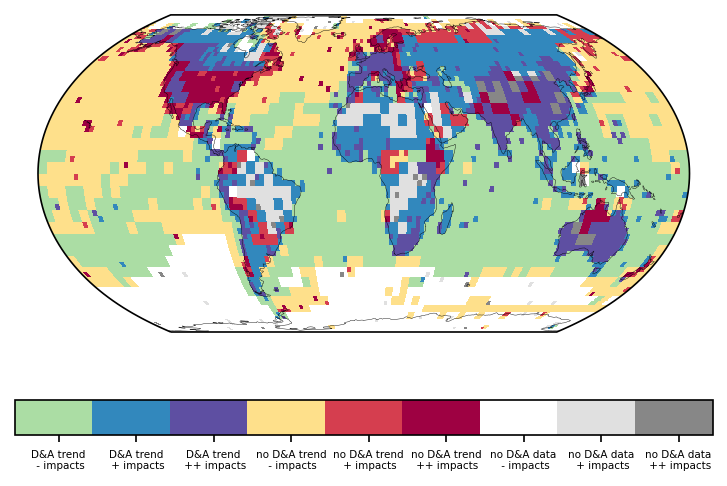

In [20]:
for degrees in [2.5]:
    ndf = pd.read_csv(f'../data/gridcell_studies_6 - Temperature - upper_pred_{degrees}.csv')
    
    print(ndf.shape)

    plt.figure(dpi=200)
    
    ndf.loc[ndf['LON']>180,"LON"]-=360

    ax = plt.axes(projection=ccrs.EqualEarth())

    n = np.array(ndf.n_study_prop).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))
    vm = n.max()
    n[n==0] = np.nan

    ax.coastlines(lw=0.1)
    mesh = ax.pcolormesh(
        ndf.LON.unique(),#-degrees*0.5,
        ndf.LAT.unique(),#-degrees*0.5,
        n,
        norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
        cmap=plt.cm.get_cmap('YlOrBr',8), 
        transform=ccrs.PlateCarree()
    )
    cbar = plt.colorbar(mesh, orientation="horizontal")
    
    cbar.ax.tick_params(labelsize=5)
    
    plt.savefig(f"../plots/maps/temp_studies_{degrees}.png")
    
    
    ndf["evidence_cat"] = np.nan
    
    lots = ndf.n_study_prop.quantile(.9)

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']==0),"evidence_cat"
    ] = 1

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']>0),"evidence_cat"
    ] = 2

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']>lots),"evidence_cat"
    ] = 3

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']==0),"evidence_cat"
    ] = 4

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']>0),"evidence_cat"
    ] = 5

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']>lots),"evidence_cat"
    ] = 6
    
    colors = ["#abdda4","#3288bd", "#5e4fa2","#fee08b","#d53e4f","#9e0142"]

    cmap = mpl.colors.ListedColormap(colors)

    do_na = True
    if do_na:
        cmap = mpl.colors.ListedColormap(colors+["white","#e0e0e0","#878787"])
        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']==0),"evidence_cat"
        ] = 7

        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']>0),"evidence_cat"
        ] = 8

        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']>lots),"evidence_cat"
        ] = 9

        
    ## DA only
        
    plt.figure(dpi=150)
    
    ax = plt.axes(projection=ccrs.EqualEarth())
    
    bn = np.zeros((len(ndf.LAT.unique()), len(ndf.LON.unique())))
    bn+=1
    
    mesh = ax.pcolormesh(
        ndf.LON.unique(),#-degrees*0.5,
        ndf.LAT.unique(),#-degrees*0.5,
        bn,
        cmap = mpl.colors.ListedColormap(["#e0e0e0"]),
        transform=ccrs.PlateCarree(),
    )
    
    n = np.array(ndf.da_cat).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))
    ax.coastlines()
    mesh = ax.pcolormesh(
        ndf.LON.unique(),
        ndf.LAT.unique(),
        n,
        cmap=plt.cm.get_cmap('RdBu_r',7), vmin=-3, vmax=3,
        transform=ccrs.PlateCarree(),
    )
    cbar = plt.colorbar(mesh, orientation="horizontal")
    
    cbar.ax.tick_params(labelsize=5)
    
    plt.savefig(f"../plots/maps/d_a_temp_{degrees}.png")
    
    
    ## Combination
    
    plt.figure(dpi=150)

    ax = plt.axes(projection=ccrs.EqualEarth())

    n = np.array(ndf.evidence_cat).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

    ax.coastlines(lw=0.2)
    mesh = ax.pcolormesh(
        ndf.LON.unique(),#-degrees*0.5,
        ndf.LAT.unique(),#-degrees*0.5,
        n,
        cmap = cmap,
        transform=ccrs.PlateCarree(),
    )
    cbar = plt.colorbar(mesh, orientation="horizontal")
    cbar.set_ticks(np.array(np.linspace(1,cmap.N,cmap.N+1)[:-1]+0.5))

    cbar.set_ticklabels([
        "D&A trend\n - impacts",
        "D&A trend\n + impacts",
        "D&A trend\n ++ impacts",
        "no D&A trend\n - impacts",
        "no D&A trend\n + impacts",
        "no D&A trend\n ++ impacts",
        "no D&A data\n - impacts",
        "no D&A data\n + impacts",
        "no D&A data\n ++ impacts"
    ])
    cbar.ax.tick_params(labelsize=5)
    
    plt.savefig(f"../plots/maps/d_a_temp_studies_{degrees}.png")

        
    

In [9]:
df = pd.read_csv('../data/category_predictions.csv')
df.head()

,Unnamed: 0,id,content,title,wosarticle__de,wosarticle__wc,ar5,seen,relevant,12 - Coastal and marine Ecosystems,...,6 - Water availability - k_prediction,6 - Water availability - k_prediction_binary,6 - Temperature - mean_prediction,6 - Temperature - std_prediction,6 - Temperature - lower_pred,6 - Temperature - upper_pred,6 - Precipitation - mean_prediction,6 - Precipitation - std_prediction,6 - Precipitation - lower_pred,6 - Precipitation - upper_pred
0,0,136746,"Grasslands, one of the most widespread land co...",Dynamic of grassland vegetation degradation an...,Grassland degradation; Climate change; Human i...,['Ecology'],0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1284614,Tree-ring width chronologies from the upper ti...,Separating temperature from precipitation sign...,Northeastern Tibetan Plateau; Tree-ring width;...,"['Geography, Physical; Geosciences, Multidisci...",0.0,0.0,0.0,0.0,...,NaN,NaN,1.000000,0.000000,1.0,1.000000,0.333333,0.471405,0.0,0.804738
2,2,1344242,This study examines the spatial and temporal p...,GIS analysis of spatial and temporal patterns ...,fire; geographic information systems; manageme...,['Forestry'],0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,289649,"Permafrost, mainly of discontinuous type, that...","Thermokarst lake, hydrological flow and water ...",Permafrost; Thermokarst lakes; Hydrological cy...,"['Engineering, Civil; Geosciences, Multidiscip...",0.0,0.0,0.0,0.0,...,NaN,NaN,0.166667,0.372678,0.0,0.539345,1.000000,0.000000,1.0,1.000000
4,4,399966,"Since 2005, Morocco has designated 28 Importan...",Factors Influencing Species-Richness of Breedi...,Breeding waterfowl; Diversity; Spatial scale; ...,['Ecology; Environmental Sciences'],0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
degrees = 2.5
tdf = pd.read_csv(f'../data/study_da_6 - Temperature - upper_pred_{degrees}.csv')
tdf["da_var"] = "Temperature"
pdf = pd.read_csv(f'../data/study_da_6 - Precipitation - upper_pred_{degrees}.csv')
pdf["da_var"] = "Precipitation"

df = pd.concat([tdf,pdf])

df = df[pd.notna(df["gridcells"]) & df["gridcells"]>0]

df["da_trend_p"] = df["da_trend_cells"] / df["gridcells"]

df.shape

(13263, 325)

In [11]:
sector_cols = [x for x in df.columns if "12 - " in x and " - upper_pred" in x]
df[sector_cols].idxmax(axis=1)
sector_cols

['12 - Mountains, snow and ice - upper_pred',
 '12 - Rivers, lakes, and soil moisture - upper_pred',
 '12 - Coastal and marine Ecosystems - upper_pred',
 '12 - Terrestrial ES - upper_pred',
 '12 - Human and managed - upper_pred']

<AxesSubplot:>

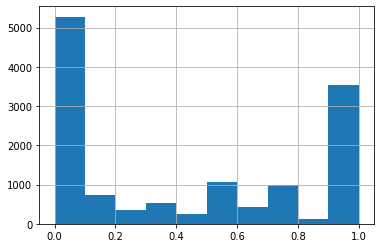

In [12]:
df[pd.notna(df["da_trend_p"])]["da_trend_p"].hist()

[Text(0, 0, 'Mountains, snow and ice'),
 Text(1, 0, 'Rivers, lakes, and soil moisture'),
 Text(2, 0, 'Coastal and marine Ecosystems'),
 Text(3, 0, 'Terrestrial ES'),
 Text(4, 0, 'Human and managed')]

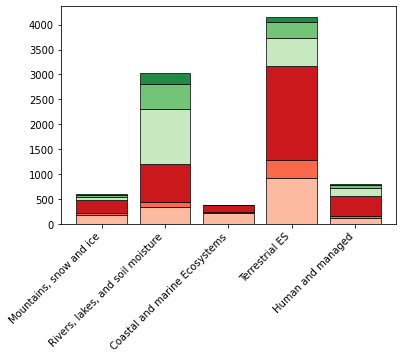

In [13]:
fig, ax = plt.subplots()

colors = ["Reds","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]

lw = 0.7

for i, col in enumerate(sector_cols):
    
    b = 0
    for j, da_var in enumerate(["Temperature","Precipitation"]):
        
        cm = mpl.cm.get_cmap(colors[j])
        
        cdf = df[(df[col]>0.5) & (df["da_var"]==da_var)]

        y = cdf[cdf['da_trend_p']==0].shape[0]
        ax.bar(i, y, bottom=b, edgecolor="black",lw=lw,color=cm(0.25))   
        b+=y

        y = cdf[(cdf['da_trend_p']>0) & (cdf['da_trend_p']<0.5)].shape[0]
        ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.5))    
        b+=y

        y = cdf[(cdf['da_trend_p']>0.5)].shape[0]
        ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.75))  
        b+=y
    
ticks, ticklabels = zip(*[(i, x.split(' - ')[1]) for i, x in enumerate(sector_cols)])
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels, rotation=45, ha="right")

In [14]:
places = pd.read_csv('../data/place_df.csv')

import pycountry_convert as pc
def get_cont(x):
    continents = {
        'NA': 'North America',
        'SA': 'South America', 
        'AS': 'Asia',
        'OC': 'Oceania',
        'AF': 'Africa',
        'EU': 'Europe'
    }
    try:
        return continents[pc.country_alpha2_to_continent_code(pc.country_alpha3_to_country_alpha2(x['country_predicted']))]
    except:
        return None
places['continent'] = places.apply(lambda x: get_cont(x), axis=1)
other_country_continents = [
    ("ESH","Africa"),
    ("TLS","Oceania"),
    ("XKX","Europe")
    
]
for country,continent in other_country_continents:
    places.loc[places['country_predicted']==country,"continent"] = continent
places.head()

,Unnamed: 0,word,spans,country_predicted,country_conf,geo,doc_id,lat,lon,feature_code,geonameid,place_name,feature_class,continent
0,0,United States,"[{'start': 427, 'end': 440}]",USA,0.999811,"{'admin1': 'NA', 'lat': '39.76', 'lon': '-98.5...",3305893,39.76,-98.5,PCLI,6252001,United States,A,North America
1,3,India,"[{'start': 140, 'end': 145}]",IND,0.999398,"{'admin1': 'NA', 'lat': '22', 'lon': '79', 'co...",1477550,22.00,79.0,PCLI,1269750,Republic of India,A,Asia
2,4,Russia,"[{'start': 697, 'end': 703}]",RUS,0.999401,"{'admin1': 'NA', 'lat': '60', 'lon': '100', 'c...",1477550,60.00,100.0,PCLI,2017370,Russian Federation,A,Europe
3,5,Pakistan,"[{'start': 763, 'end': 771}]",PAK,0.989610,"{'admin1': 'Punjab', 'lat': '31.4706', 'lon': ...",1477550,30.00,70.0,PCLI,1168579,Islamic Republic of Pakistan,A,Asia
4,8,Cameroon,"[{'start': 213, 'end': 221}]",CMR,0.999931,"{'admin1': 'NA', 'lat': '6', 'lon': '12.5', 'c...",1336166,6.00,12.5,PCLI,2233387,Republic of Cameroon,A,Africa


(0.0, 1.0, 0.0, 1.0)

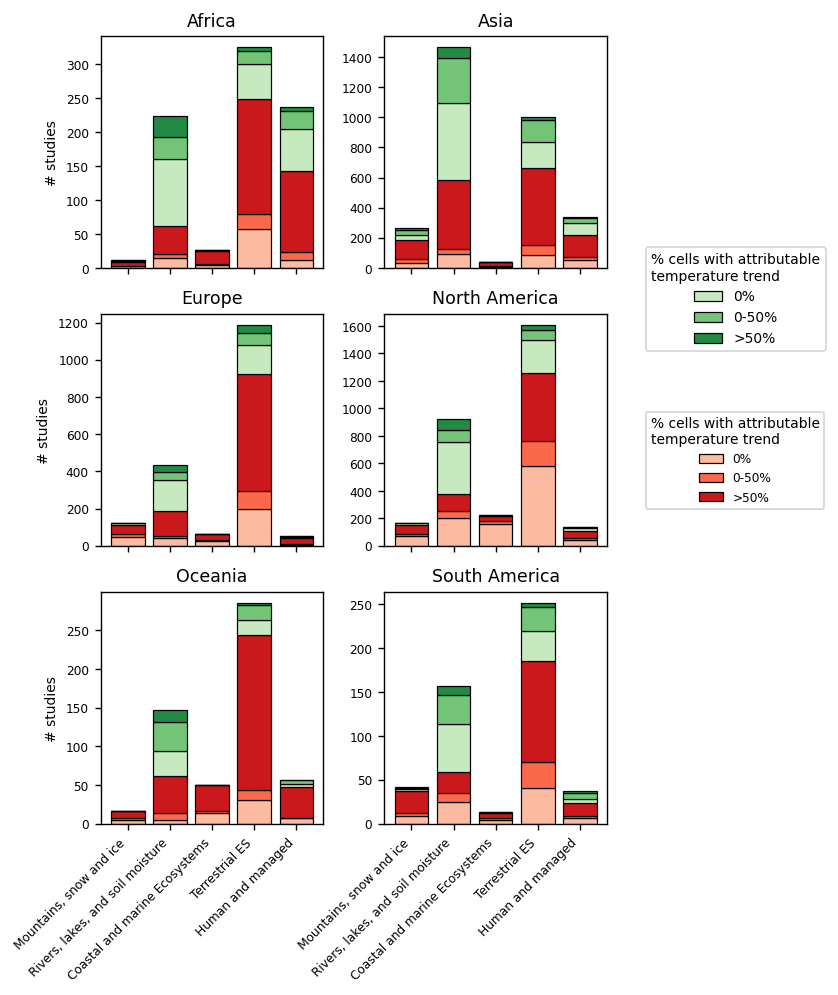

In [15]:

cols = 2

#fig, axs = plt.subplots(7//cols,cols, figsize=(7,7), dpi=125, sharex=True)

fig = plt.figure(figsize=(7,7), dpi=125)

gs = gridspec.GridSpec(6//cols, cols+1, width_ratios=[1]*cols+[0.5], bottom=.05, top=.95, wspace=.33)

ax = None



for ci, (continent, group) in enumerate(places.groupby('continent')):    
    
    #if ax is not None:    
    #ax = axs[ci//cols, ci%cols]
    
    ax = plt.subplot(gs[ci//cols, ci%cols])
    
    colors = ["Reds","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]

    lw = 0.7
    
    vdf = df[df["id"].isin(group["doc_id"])]
    
    vdf.da_trend_p.mean()

    for i, col in enumerate(sector_cols):

        b = 0
        all_handles = []
        for j, da_var in enumerate(["Temperature","Precipitation"]):

            cm = mpl.cm.get_cmap(colors[j])

            cdf = vdf[(vdf[col]>0.5) & (vdf["da_var"]==da_var) ]

            y = cdf[cdf['da_trend_p']==0].shape[0]
            l1 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw,color=cm(0.25))   
            b+=y

            y = cdf[(cdf['da_trend_p']>0) & (cdf['da_trend_p']<0.5)].shape[0]
            l2 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.5))    
            b+=y

            y = cdf[(cdf['da_trend_p']>0.5)].shape[0]
            l3 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.75))  
            b+=y
            
            var_handles = [l1,l2,l3]
            all_handles.append(var_handles)

    ticks, ticklabels = zip(*[(i, x.split(' - ')[1]) for i, x in enumerate(sector_cols)])
    ax.set_xticks(ticks)
    if ci//cols+1 < 6//cols:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ticklabels, rotation=45, ha="right")
        
    ax.set_title(continent, fontsize=10)
    if ci%cols==0:
        ax.set_ylabel("# studies", fontsize=8)
        
    ax.tick_params(axis='both', which='major', labelsize=7)
        
        
attrib_labels = [
    "0%",
    "0-50%",
    ">50%"
]
    
    
ax = plt.subplot(gs[:, 2])
l0 = ax.legend(
    all_handles[0], attrib_labels, 
    loc=(-0.2,0.4),
    fontsize=7
)    
l0.set_title("% cells with attributable\ntemperature trend", prop={'size':8})
l1 = ax.legend(
    all_handles[1], 
    attrib_labels, 
    loc=(-0.2,0.6),
    fontsize=8
)
l1.set_title("% cells with attributable\ntemperature trend", prop={'size':8})
plt.gca().add_artist(l0)
ax.axis("off")
